 # TITANIC - KAGGLE CHALLENGE  

### Titanic rescue prediction using Decision Tree


 

In [2]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# PART 1: Data Handling

In [3]:
data=pd.read_csv("titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table 
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
# To define X I can simply drop the collumn I don't need, which is the Y 
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived 
Y = data["Survived"] #Another way to declare: Y = data.Survived 
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [8]:
#Some filles with the ages are empy. Checkin out the first 10 lines
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [10]:
#Now want data to training (80%) and testing (20%) 
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other 
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Length: 179]

[     Pclass  Sex        Age
 173       3    0  21.000000
 351       1    0  29.699118
 604       1    0  35.000000
 24        3    1   8.000000
 472       2    1  33.000000
 ..      ...  ...        ...
 424       3    0  18.000000
 254       3    1  41.000000
 200       3    0  28.000000
 35        1    0  42.000000
 227       3    0  20.500000
 
 [712 rows x 3 columns],      Pclass  Sex        Age
 759       1    1  33.000000
 72        2    0  21.000000
 520       1    1  30.000000
 440       2    1  45.000000
 451       3    0  29.699118
 ..      ...  ...        ...
 382       3    0  32.000000
 687       3    0  19.000000
 78        2    0   0.830000
 74        3    0  32.000000
 538       3    0  29.699118
 
 [179 rows x 3 columns], 173    0
 351    0
 604    1
 24     0
 472    1
       ..
 424    0
 254    0
 200    0
 35     0
 227    0
 Name: Survived, Length: 712, dtype: int64, 759    1
 72     0
 520    1
 440    1
 451    0
       ..
 382    0
 687    0
 78     1
 74     1

In [11]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)

712

In [12]:
len(X_test)

179

In [14]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased 
X_test

,Pclass,Sex,Age
298,1,0,29.699118
197,3,0,42.000000
294,3,0,24.000000
884,3,0,25.000000
45,3,0,29.699118
...,...,...,...
756,3,0,28.000000
227,3,0,20.500000
574,3,0,16.000000
786,3,1,18.000000


#  Decision Tree   

In [17]:
#If it is empty it will create it with as many levels it can. TO avoid this we put max_dep to determine how many levels we want
#The sext parameter will be the criteria. If I dont put it will use gini. If I wanted to use entropy I'd have to put it. I want to use gini, so I don't need to put it
model_dt = tree.DecisionTreeClassifier(criterion= 'gini', splitter= 'random',max_depth=3)    #model with deph 3
model_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [18]:
#Now the method fit will adjust data, trainning the model
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [19]:
#Using predict method to test the model
model_dt.predict(X_test) #always gets x and retuns y

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [20]:
#Storing the result in a variable 
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [21]:
#Dataframe to show Y real and Y predicted:
#Using a dictionary to separate columns  
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
result

,Survided REAL,Survived PREDICTION
298,1,0
197,0,0
294,0,0
884,0,0
45,0,0
...,...,...
756,0,0
227,0,0
574,0,0
786,1,1


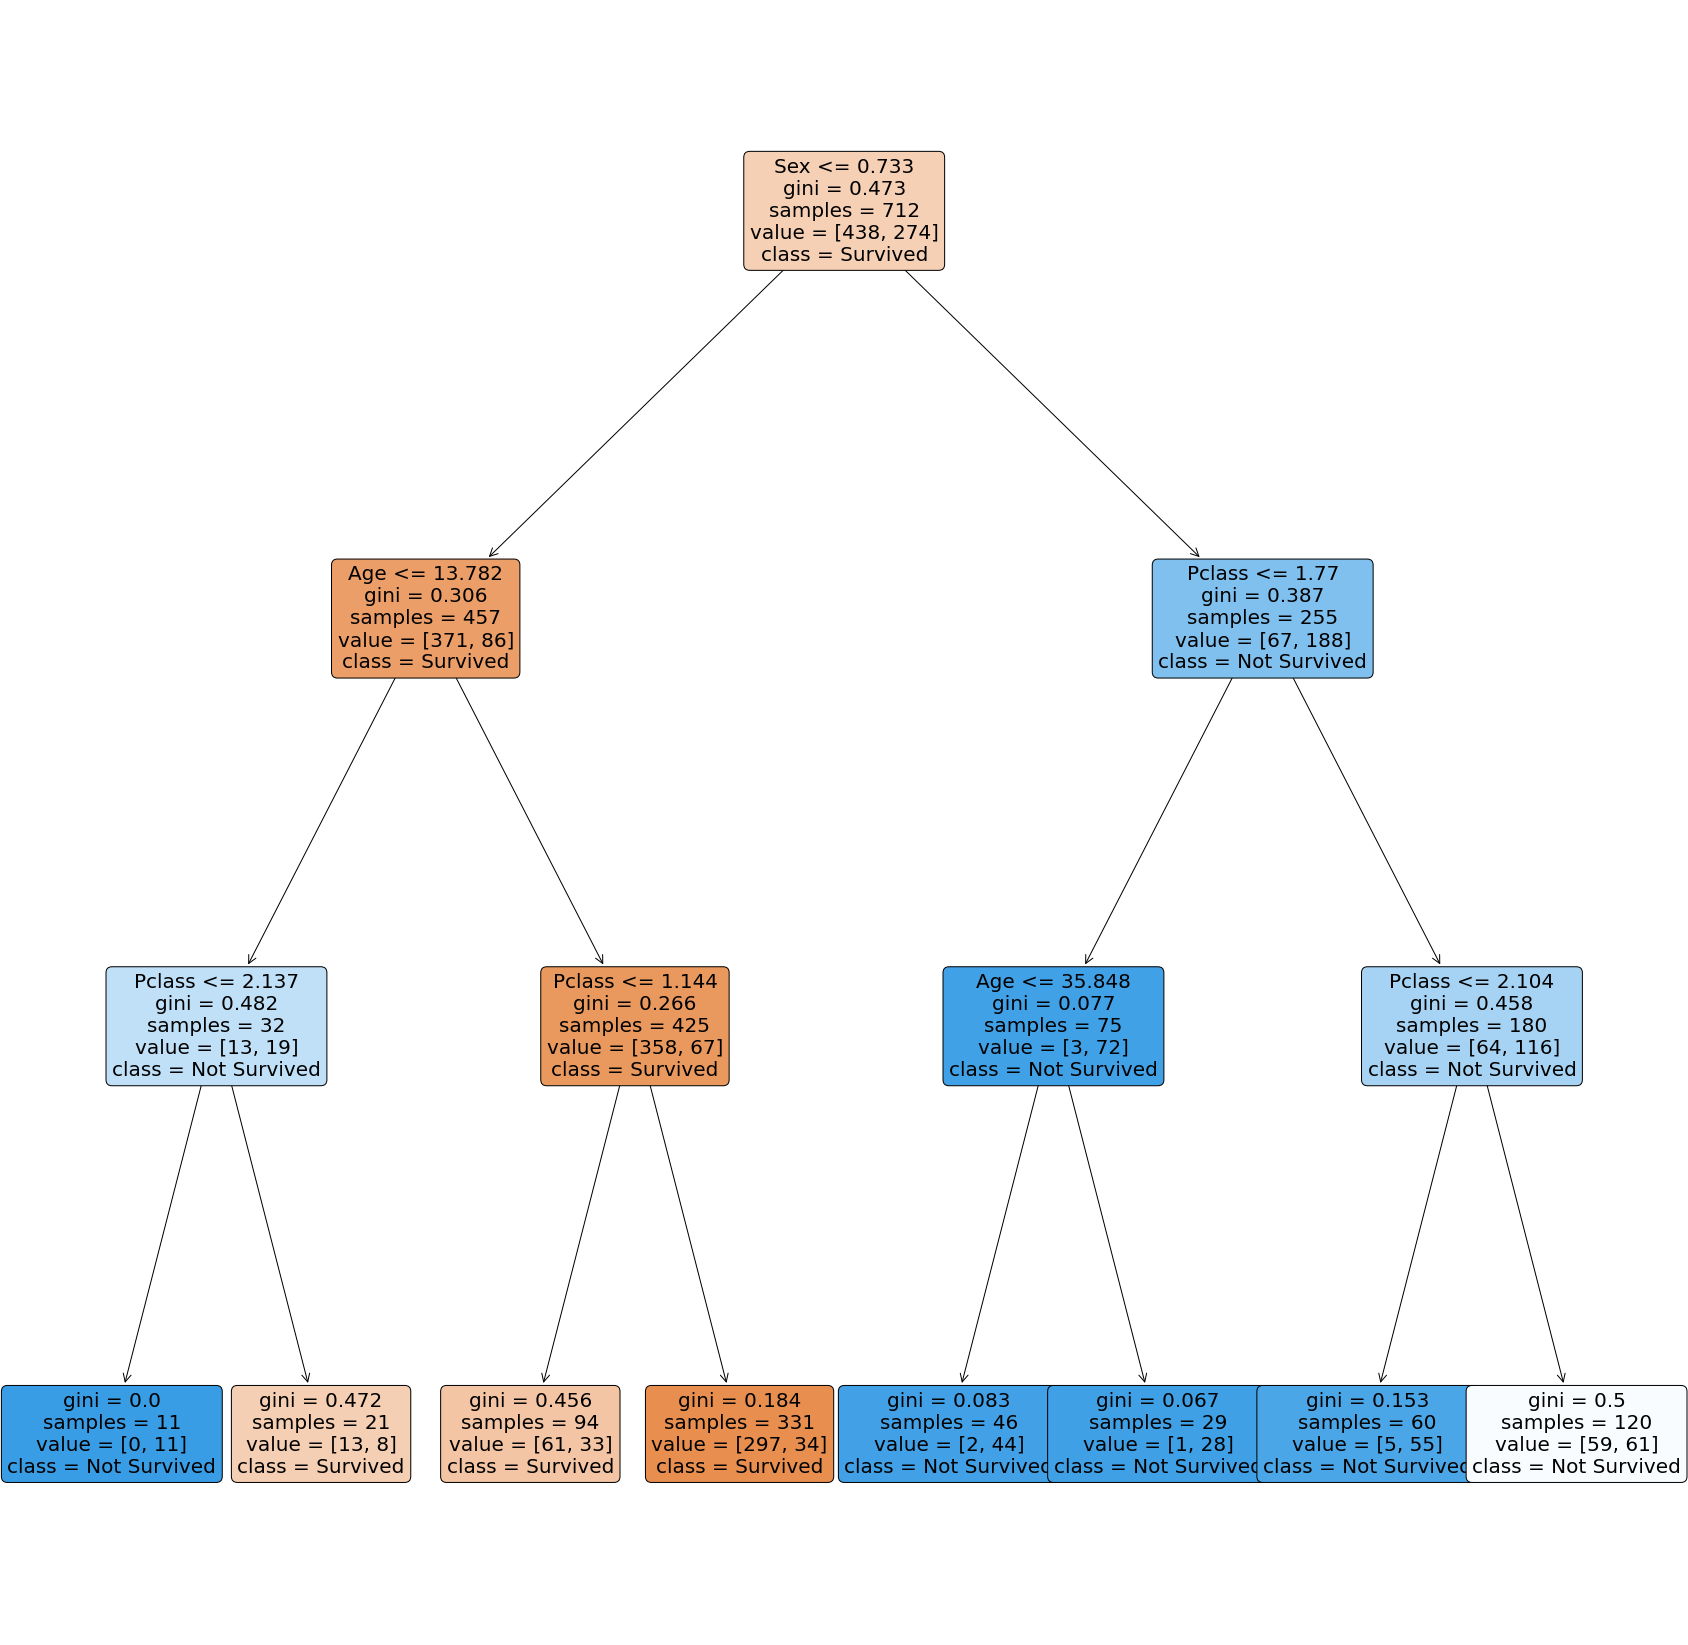

In [22]:
# Plotting the tree
plt.figure(figsize=(30,30))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [23]:
# Here is another way to find the accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
print ("Accuracy is : "+  str (accuracy))
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
print("Precision is :"+ str( precision_dt))
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
print(" Recall is :" + str(recall_dt))
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
print (str(confusion_matrix_dt) +  ":is the Confusion Matrix")

Accuracy is : 0.7988826815642458
Precision is :0.7666666666666667
 Recall is :0.6764705882352942
[[97 14]
 [22 46]]:is the Confusion Matrix


#### b) Precision

In [24]:
# Precision = true positive / true positive + false positive
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.7666666666666667

#### c) Recall

In [25]:
# Recall = true positive / true positive + false negative
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt

0.6764705882352942

#### d) Confusion matrix

In [26]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[97, 14],
       [22, 46]], dtype=int64)

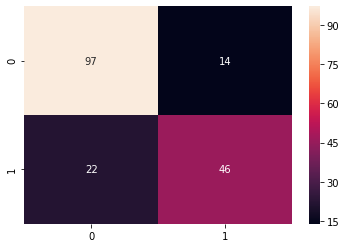

In [27]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)

#### e) AUC - ROC Curve

In [28]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.775172231054584

## Decision Tree - k-Fold Cross-Validation

Now using kfold, a model validation technique which is not using my pre-trained model


In [29]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
kf_dt = KFold(n_splits=5,shuffle=True)  
cv_dt = cross_val_score(model_dt, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.7777477873328731